<a href="https://colab.research.google.com/github/Kalaikujji/kalai/blob/main/employee%20salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('seaborn-v0_8-darkgrid')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('/content/Employee_Salaries.csv')

In [4]:
df.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


In [5]:
df.tail()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
10286,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.0000,0.0,0.00,N28
10287,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Director,F,215032.1000,0.0,0.00,NaN
10288,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Office of Zoning and Administrative Hea...,F,84365.5529,0.0,0.00,N18
10289,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,98228.0000,0.0,1596.27,N21
10290,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,177976.3100,0.0,0.00,N35


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


In [7]:
df.describe()

,Base_Salary,Overtime_Pay,Longevity_Pay
count,10291.000000,10291.000000,10291.000000
mean,90312.165744,8081.288954,1533.882816
std,31240.842929,16491.833017,3209.041070
min,11147.240000,0.000000,0.000000
25%,70023.000000,0.000000,0.000000
50%,87328.000000,258.420000,0.000000
75%,108084.000000,9190.970000,1225.680000
max,292000.000000,227428.990000,20279.460000


In [8]:
df.isnull().sum()

Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
Grade              33
dtype: int64

In [10]:
df.drop(['Grade'],axis=1,inplace=True)

In [11]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [13]:
df.dtypes

Department          object
Department_Name     object
Division            object
Gender              object
Base_Salary        float64
Overtime_Pay       float64
Longevity_Pay      float64
dtype: object

In [14]:
df.isnull().sum()

Department         0
Department_Name    0
Division           0
Gender             0
Base_Salary        0
Overtime_Pay       0
Longevity_Pay      0
dtype: int64

Text(0, 0.5, 'Count')

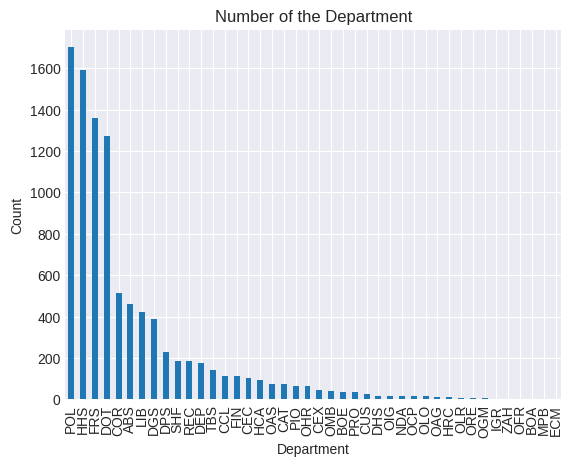

In [19]:
df['Department'].value_counts().plot(kind='bar', title='Number of the Department')
plt.xlabel('Department')
plt.ylabel('Count')

Text(0, 0.5, 'Division')

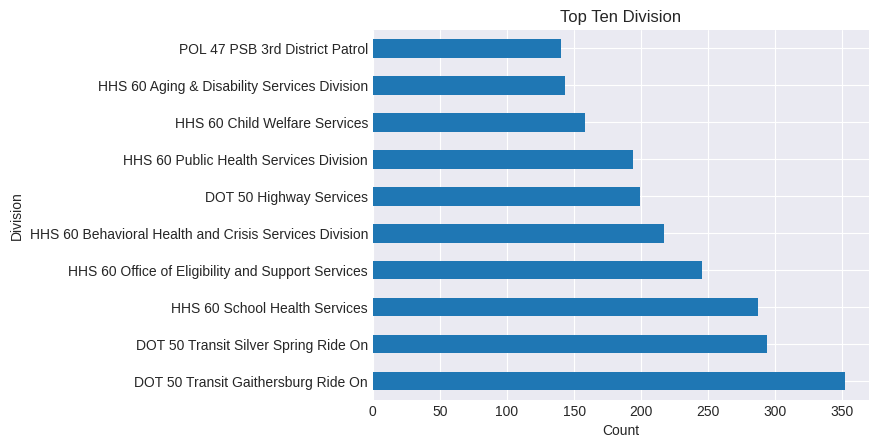

In [23]:
df['Division'].value_counts() \
  .head(10) \
  .plot(kind='barh', title='Top Ten Division')
plt.xlabel('Count')
plt.ylabel('Division')

Text(0, 0.5, 'Count')

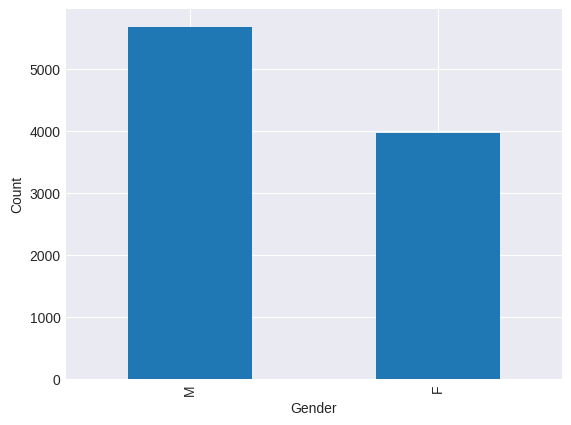

In [29]:
df['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')

Text(0, 0.5, 'Base Salary')

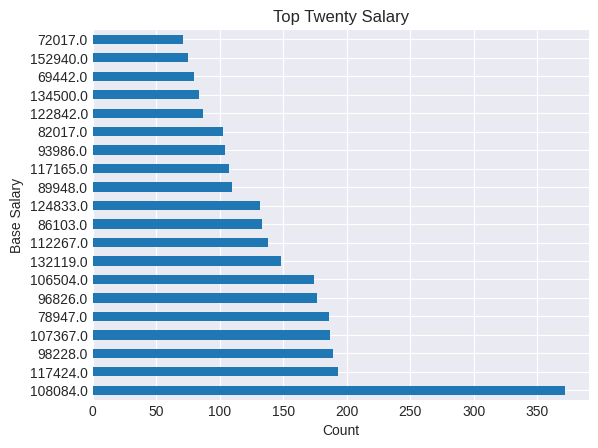

In [33]:
df['Base_Salary'].value_counts() \
  .head(20) \
  .plot(kind='barh', title='Top Twenty Salary')
plt.xlabel('Count')
plt.ylabel('Base Salary')

Text(0, 0.5, 'count')

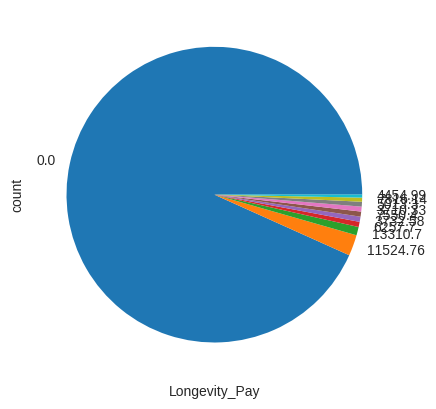

In [36]:
df['Longevity_Pay'].value_counts().head(10)\
    .plot(kind='pie')
plt.xlabel('Longevity_Pay')
plt.ylabel('count')

In [37]:
df['Overtime_Pay'].value_counts().head(10)

Overtime_Pay
0.00       4042
22.60         5
45.20         4
50.08         3
116.28        3
21.74         2
3652.91       2
421.89        2
17.98         2
475.60        2
Name: count, dtype: int64

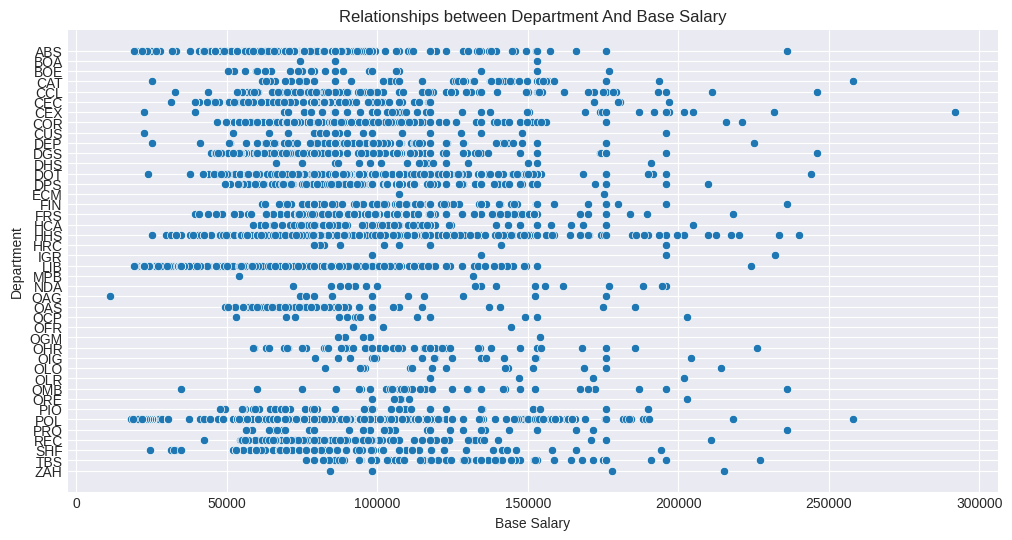

In [41]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(data=df,
               x='Base_Salary',
               y='Department'
               )
plt.title('Relationships between Department And Base Salary')
plt.xlabel('Base Salary')
plt.ylabel('Department')
plt.show()

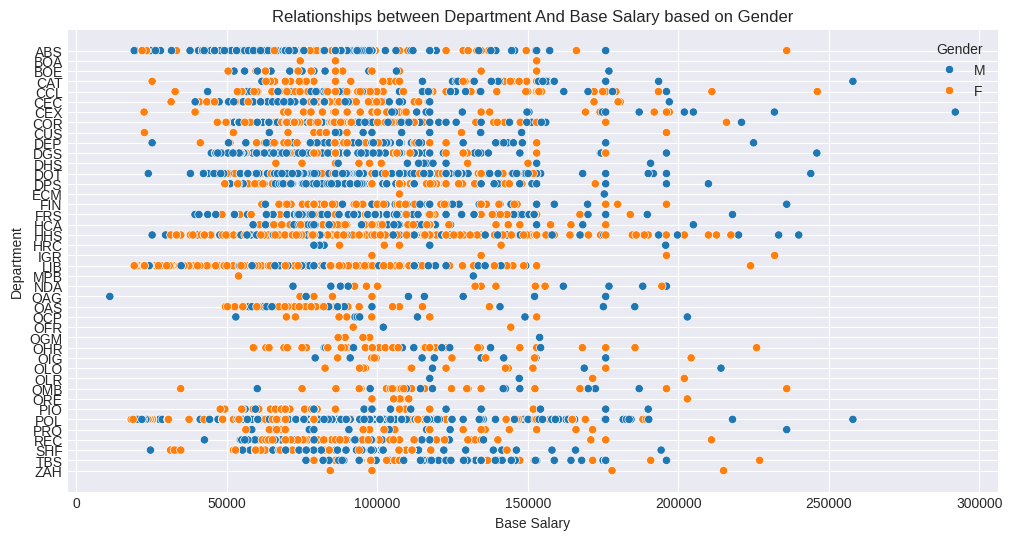

In [42]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(data=df,
               x='Base_Salary',
               y='Department',
               hue='Gender')
plt.title('Relationships between Department And Base Salary based on Gender')
plt.xlabel('Base Salary')
plt.ylabel('Department')
plt.show()

In [43]:
df_corr = df[['Base_Salary', 'Overtime_Pay', 'Longevity_Pay']].corr()
df_corr

,Base_Salary,Overtime_Pay,Longevity_Pay
Base_Salary,1.000000,0.073802,0.295941
Overtime_Pay,0.073802,1.000000,0.228388
Longevity_Pay,0.295941,0.228388,1.000000


<Axes: >

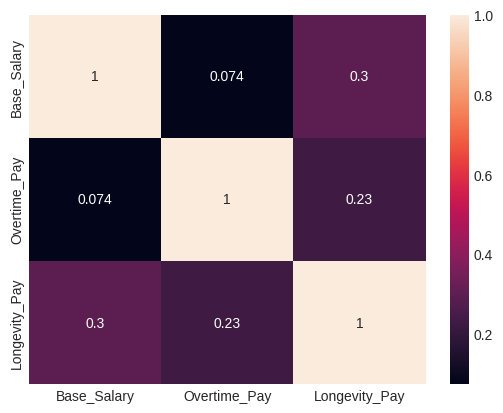

In [44]:
sns.heatmap(df_corr, annot=True)

In [ ]:
df.groupby('Department')['Base_Salary'].agg(['mean', 'max', 'min'])